In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [4]:
# Importing the dataset and displaying the first 5 rows

data = pd.read_csv('data/student_scores.csv')

# Displaying the first few rows of the dataset to understand its structure
data.head()

# Summary of the dataset
data.describe()
data.dropna() # Drop the rows with missing values


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<Figure size 1200x600 with 0 Axes>

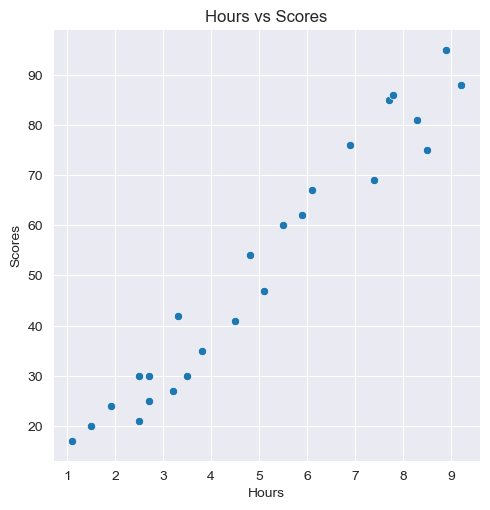

In [6]:
# Scatterplot of the raw data
# This plot shows the relationship between student scores and hours studied before applying the model
plt.figure(figsize=(12,6))
sns.relplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [9]:
# Splitting the dataset into the training set and test set
# X is the feature set which is the number of hours studied
# Y is the target variable which is the student scores
# We are predicting the student scores based on the number of hours studied
X = data.iloc[:, :-1].values
type(X)

y = data.iloc[:, -1].values
type(y)

# We split the data so that 80% is used for training the model and 20% for testing it
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Creating and fitting the linear regression model
# Linear regression will find the best-fit line that predicts the student scores based on the number of hours studied
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on the test set
# The model uses the test data to predict the student scores
y_pred = lr.predict(X_test)



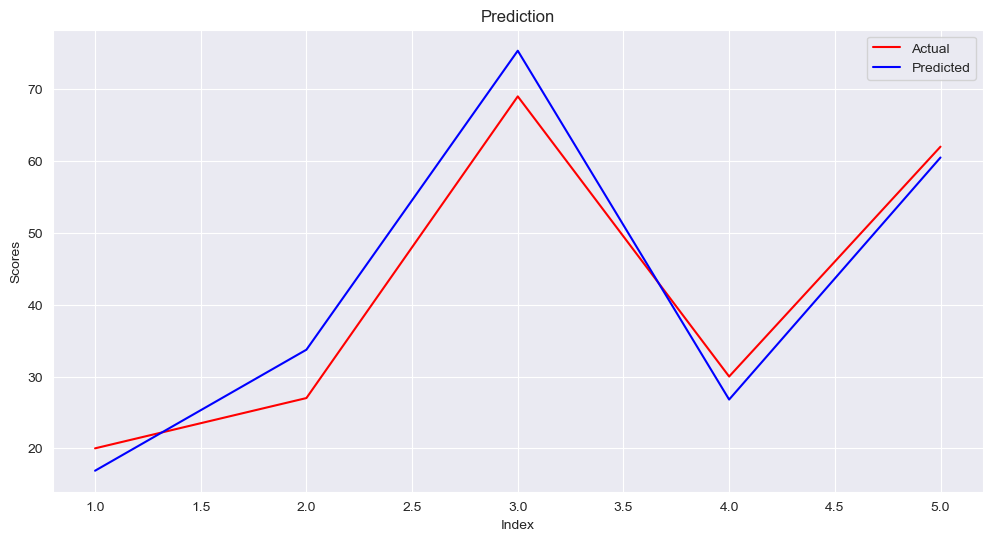

In [11]:
# Plot of actual vs predicted values as an overlapping line chart
# This plot shows how well the model's predictions match the actual prices

plt.figure(figsize=(12,6))
c = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(c, y_test, color='r', linestyle='-')
plt.plot(c, y_pred, color='b', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Prediction')
plt.legend(['Actual', 'Predicted'])
plt.ticklabel_format(axis="y", style="plain")
plt.show()

Analysis of the graph: The actual and predicted values are close to each other, which indicates that the model is making accurate predictions.

The red line represents the actual student scores, while the blue line represents the predicted student scores. The areas of overlap between the two lines show that the model is making accurate predictions.

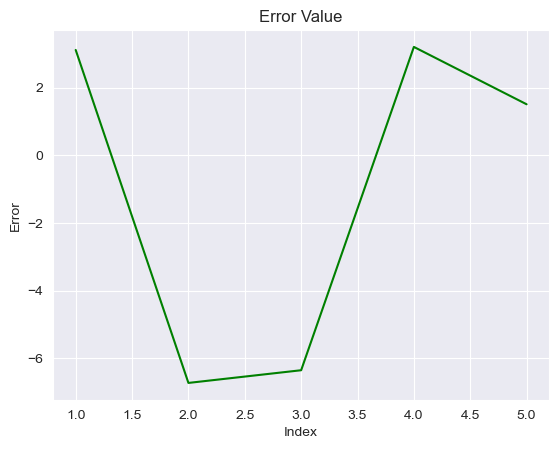

In [12]:
# Plot of the error
# This plot shows the difference between actual and predicted scores for each data point in the test set

c = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(c, y_test - y_pred, color='green', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

Analysis of the graph: The error values are close to zero, which indicates that the model is making accurate predictions.


In [13]:
# Calculating and printing the Mean Squared Error and R-squared
# MSE measures the average squared difference between actual and predicted values
# R-squared indicates how well the model explains the variability of the target variable (scores)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-squared: 0.9454906892105354


Mean Absolute Error (MAE)
Value: 4.18

Interpretation: On average, the model's predictions are off by approximately 4.18 units. This metric measures the average magnitude of the errors in a set of predictions, without considering their direction.

Mean Squared Error (MSE)
Value: 21.60

Interpretation: This metric represents the average of the squares of the errors. It penalizes larger errors more than MAE. The value of 21.60 suggests that there are some discrepancies between the actual and predicted values, but they are relatively small.

Root Mean Squared Error (RMSE)
Value: 4.65

Interpretation: This is the square root of the MSE and provides an error metric in the same units as the target variable. An RMSE of approximately 4.65 indicates that the model's predictions deviate from the actual values by this amount on average.

R-squared (R²)
Value: 0.95

Interpretation: This metric indicates that approximately 94.5% of the variance in the target variable can be explained by the model. An R² value closer to 1 indicates a better fit, so 0.95 suggests that the model has a very high level of explanatory power.

Conclusion
The model's performance is quite good, as indicated by the low error values (MAE, MSE, RMSE) and the high R-squared value. This suggests that the model is accurately capturing the relationship between the features and the target variable, with minimal prediction errors.

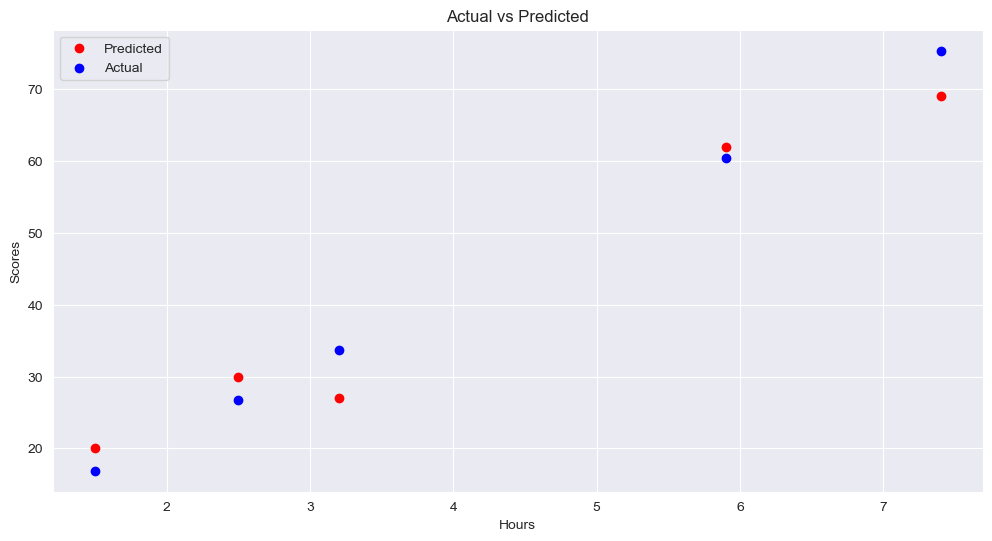

In [16]:
# Plot actual and predicted values
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['Predicted', 'Actual'])
plt.ticklabel_format(axis="y", style="plain")
plt.show()

Analysis of the graph: The actual and predicted values are close to each other, which indicates that the model is making accurate predictions.

The red dots represent the actual student scores, while the blue dots represent the predicted student scores. The proximity of the blue dots to the red dots shows that the model is making accurate predictions.

In [17]:
# Printing the intercept and coefficient
# The intercept is the value of the price when sqft_living is 0
# The coefficient indicates how much the price changes with each unit increase in sqft_living
print('Intercept of the model:', lr.intercept_)
print('Coefficient of the line:', lr.coef_)

Intercept of the model: 2.018160041434662
Coefficient of the line: [9.91065648]


Analysis of the Intercept and Coefficient

Intercept
Value: 2.018160041434662

Interpretation: The intercept represents the expected value of the student scores when the number of hours studied is zero. Since it is not practical to have zero hours of study, this value is not meaningful in a real-world context but is necessary for the linear regression equation.

Coefficient
Value: 9.910656480642237

Interpretation: The coefficient indicates the expected change in student scores for each additional hour studied. Specifically, for every additional hour studied, the student scores are expected to increase by approximately 9.91 units. This positive coefficient confirms a direct relationship between study hours and student scores.

Conclusion

The intercept and coefficient together form the linear regression equation: [ \text{Scores} = 2.018 + 9.911 \times \text{Hours} ]  This equation can be used to predict student scores based on the number of hours studied. The positive coefficient suggests that more study hours are associated with higher student scores, which aligns with common educational trends.

